### Project Two: Customer analytics

We will learn how to use data to understand customer behavior better, how to use machine learning to predict the likelihood of marketing engagement and the value of individual customers over their lifetime, and how to use data science for better customer retention

##### Customer analytics: understanding customer behavior
As we gather and track more data on customers and their behavior regarding individual sales, marketing platforms, and channels, it becomes easier for marketers to analyze and understand how different customers react to different marketing strategies. 

Three typical tpyes of customer analytics:
- **Sales channel analytics**. By analyzing sales funnel data, we can monitor and track the life cycle of customers, gaining insights such as through which marketing channel they sign up, how often they log into the system.

- **Customer segmentation** is a good example and outcome of customer analytics. Through identifying subgroups of similar customers, you can better understand the target populations

- **Predictive analytics** to have a deeper understanding of what attributes and characteristics of customers are highly correlated with the outcomes of your interest

### Case Study 2: 
#### Conduct customer analytics for a car insurance company

You work as a data analyst for a Car Insurance company. The company recently did a campaign for customers whose car insurance were going to expire. The campaign wad delivered through different sales channels and performance data was collected.

You need to conduct customer analytics and build a regression model to predict engagement rate for the campaign

In [1]:
%matplotlib inline
# use the %matplotlib inline command to show plots on the Jupyter Notebook
import matplotlib.pyplot as plt
import pandas as pd
import pandasql

df = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

Now that we have loaded the data into our Python environment, we are going to analyze it to understand how different customers behave and react to different marketing strategies. 

Please **answer the questions from 1 to 10** by yourselves :
- Overall engagement rate (Response)
- Engagement rates by offer type
- Engagement rates by offer type and vehicle class
- Engagement rates by sales channel
- Engagement rates by sales channel and vehicle size

#### Exploratory data analysis

1.Return Top 5 records

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


2.Check if any columns have missings

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

3.Check out how many records and columns by using shape

(9134, 24)

4.Use value_counts() check the target variable 'Response'

No     7826
Yes    1308
Name: Response, dtype: int64

5.Get the overall engagement rate

Response
No     0.856799
Yes    0.143201
Name: Customer, dtype: float64

6. Create a column 'Engaged' first, when Response = No, then Engaged=0 else 1

,Engaged,Response
0,0,No
1,0,No
2,0,No
3,0,No
4,0,No
5,1,Yes
6,1,Yes
7,0,No
8,1,Yes
9,0,No


7.Get engagement rates by offer type

Renew Offer Type
Offer1    0.158316
Offer2    0.233766
Offer3    0.020950
Offer4         NaN
Name: Customer, dtype: float64

8.Get engagement rates by offer type and vehicle class

Renew Offer Type  Vehicle Class
Offer1            Four-Door Car    0.070362
                  Luxury Car       0.001599
                  Luxury SUV       0.004797
                  SUV              0.044776
                  Sports Car       0.011194
                  Two-Door Car     0.025586
Offer2            Four-Door Car    0.114833
                  Luxury Car       0.002051
                  Luxury SUV       0.004101
                  SUV              0.041012
                  Sports Car       0.016405
                  Two-Door Car     0.055366
Offer3            Four-Door Car    0.016760
                  Two-Door Car     0.004190
Name: Customer, dtype: float64

In [15]:
  # To make this more readable
by_offer_type_df = by_offer_type_df.unstack().fillna(0)
by_offer_type_df

Vehicle Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
Renew Offer Type,,,,,,
Offer1,0.070362,0.001599,0.004797,0.044776,0.011194,0.025586
Offer2,0.114833,0.002051,0.004101,0.041012,0.016405,0.055366
Offer3,0.016760,0.000000,0.000000,0.000000,0.000000,0.004190


9.Engagement rates by sales channel

Sales Channel
Agent          0.191544
Branch         0.114531
Call Center    0.108782
Web            0.117736
Name: Customer, dtype: float64

10.Engagement rates by sales channel and vehicle size

Sales Channel  Vehicle Size
Agent          Large           0.020708
               Medsize         0.144953
               Small           0.025884
Branch         Large           0.021036
               Medsize         0.074795
               Small           0.018699
Call Center    Large           0.013598
               Medsize         0.067989
               Small           0.027195
Web            Large           0.013585
               Medsize         0.095094
               Small           0.009057
Name: Customer, dtype: float64

In [19]:
by_sales_channel_df=by_sales_channel_df.unstack()
by_sales_channel_df

Vehicle Size,Large,Medsize,Small
Sales Channel,,,
Agent,0.020708,0.144953,0.025884
Branch,0.021036,0.074795,0.018699
Call Center,0.013598,0.067989,0.027195
Web,0.013585,0.095094,0.009057


###### Segmenting customer base
we will be segmenting our customer base by Customer Lifetime Value and Months Since Policy Inception


In [11]:
df['Customer Lifetime Value'].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

Based on this information, we are going to define those customers with a Customer Lifetime Value higher than the median as high-CLV customers and those with a CLV below the median as low-CLV customers.

In [12]:
df['CLV Segment'] = df['Customer Lifetime Value'].apply(
    lambda x: 'High' if x > df['Customer Lifetime Value'].median() else 'Low'
)
df['CLV Segment']

0        Low
1       High
2       High
3       High
4        Low
5       High
6        Low
7       High
8       High
9       High
10       Low
11      High
12      High
13      High
14       Low
15      High
16       Low
17       Low
18       Low
19      High
20       Low
21       Low
22      High
23       Low
24       Low
25      High
26       Low
27       Low
28      High
29       Low
        ... 
9104     Low
9105     Low
9106    High
9107     Low
9108     Low
9109     Low
9110    High
9111     Low
9112     Low
9113     Low
9114    High
9115    High
9116     Low
9117    High
9118    High
9119     Low
9120     Low
9121     Low
9122    High
9123     Low
9124    High
9125    High
9126     Low
9127     Low
9128     Low
9129    High
9130     Low
9131    High
9132    High
9133     Low
Name: CLV Segment, Length: 9134, dtype: object

In [13]:
# the same process for the Months Since Policy Inception field
    # Inception date is a car insurance term that refers to the date that an insurance policy actually begins
df['Months Since Policy Inception'].describe()

count    9134.000000
mean       48.064594
std        27.905991
min         0.000000
25%        24.000000
50%        48.000000
75%        71.000000
max        99.000000
Name: Months Since Policy Inception, dtype: float64

In [14]:
df['Policy Age Segment'] = df['Months Since Policy Inception'].apply(
    lambda x: 'High' if x > df['Months Since Policy Inception'].median() else 'Low'
)
df['Policy Age Segment'].unique()

array(['Low', 'High'], dtype=object)

In [16]:
# let's see whether there is any noticeable difference in the engagement rates among these four segments
engagment_rates_by_segment_df = df.loc[
    df['Response'] == 'Yes'
].groupby(
    ['CLV Segment', 'Policy Age Segment']
).count()['Customer']/df.groupby(
    ['CLV Segment', 'Policy Age Segment']
).count()['Customer']
engagment_rates_by_segment_df

CLV Segment  Policy Age Segment
High         High                  0.138728
             Low                   0.132067
Low          High                  0.162450
             Low                   0.139957
Name: Customer, dtype: float64

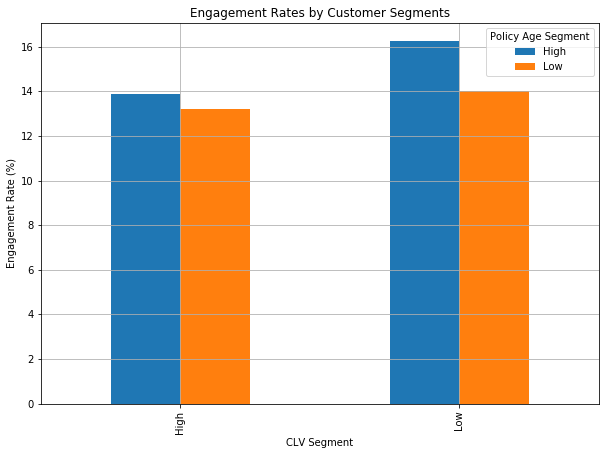

In [49]:
ax = (engagment_rates_by_segment_df.unstack()*100.0).plot(
    kind='bar',
    figsize=(10, 7),
    grid=True
)

ax.set_ylabel('Engagement Rate (%)')
ax.set_title('Engagement Rates by Customer Segments')

plt.show()

###### Predictive analytics in marketing
Using customer analytics, you can monitor and track KPIs on how customers react to different products and marketing strategies, effectively **build segments of similar customers**, and build predictive models to improve engagement and retention rates, as well as optimize marketing channels.

Let's recap the four popular use cases of predictive analytics in marketing:
- **Likelihood of engagement**: Predictive analytics can help marketers forecast the likelihood of customer engagements with their marketing strategies. For example, if your marketing happens a lot in the email space, you can utilize predictive analytics to forecast which customers have a high likelihood of opening your marketing emails and custom-tailor your marketing strategies to those high-likelihood customers to maximize your marketing results. For another example, if you are displaying advertisements on social media, predictive analytics can help you identify certain types of customers that are likely to click on the ads

- **Customer lifetime value**: Predictive analytics can help you forecast the expected lifetime values of your customers. Using historical transactional data, predictive analytics can help you identify high-value customers within your customer base. With these predictions, you and your firm can focus more on building healthy relationships with those high-value customers

- **Recommending the right products and contents**: As we have already discussed in Chapter 6, Recommending the Right Products, we can use data science and machine learning to predict which customers are likely to purchase products or view contents. Using these predictions, you can improve customer conversion rates by recommending the right products and contents for individual customers

- **Customer acquisition and retention**: Predictive analytics has also been heavily used for customer acquisition and retention. Based on the profile data you gathered about your prospects or leads and the historical data of your existing customers, you can apply predictive analytics to identify high-quality leads or rank the leads by their likelihood of being converted into active customers. On the other hand, you can use the customer churn data and the historical data of your existing customers to develop predictive models to forecast which customers are likely to leave or unsubscribe from your products.

Let's recall how to evaluate classification models:

The first metric that can be used to measure prediction performance is **accuracy**. Accuracy is simply the percentage of correct predictions out of all predictions, as shown in the following formula:
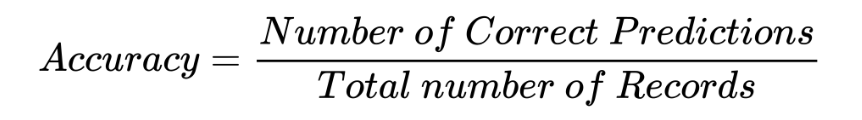

The second metric that is commonly used for classification problems is **precision**. Precision is defined as the number of true positives divided by the total number of true positives and false positives:
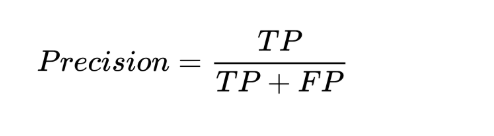

Along with precision, **recall** is also commonly used to evaluate the performances of classification models. Recall is defined as the number of true positives divided by the number of true positives plus false negatives. Recall can be thought of as a measure of how much of the positive cases are retrieved or found by the model
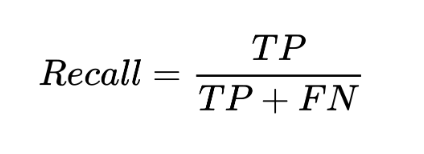

The receiver operating characteristic (**ROC**) curve and The area under the curve (**AUC**). 
The ROC curve shows how true positive rates and false positive rates change at different thresholds. The AUC is simply the total area under the ROC curve. The AUC ranges from 0 to 1 and a higher AUC number suggests better model performance.

A random classifier has an AUC of 0.5, so any classifier with an AUC higher than 0.5 suggests that the model performs better than random predictions:
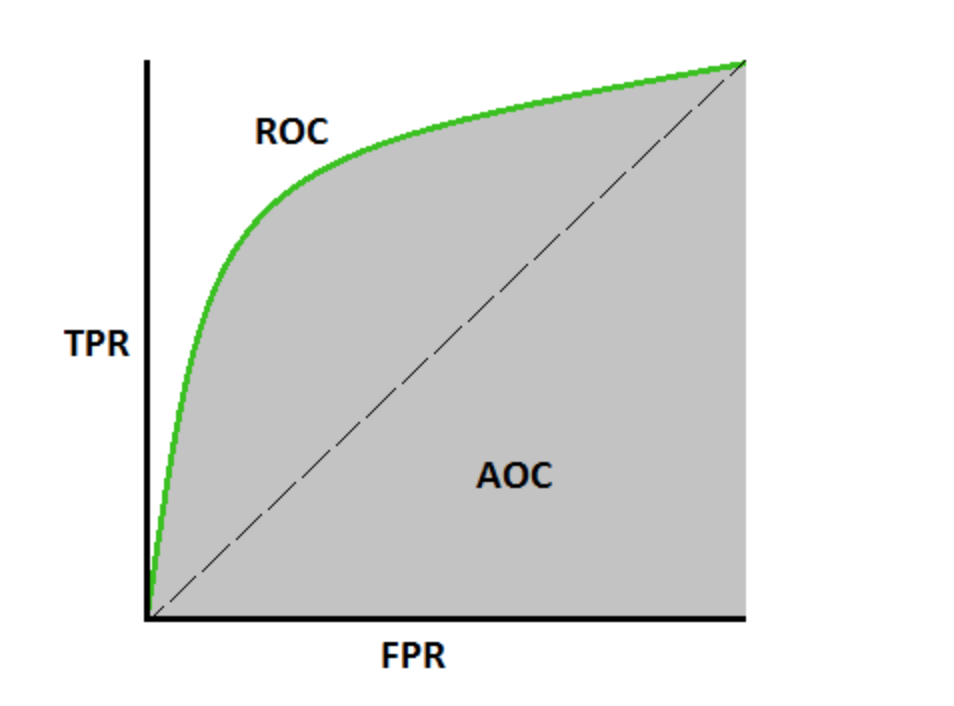

###### Now, we are going to discuss how to conduct and interpret regression analysis in Python by using the statsmodels package.
let's first build a logistic regression model with continuous variables

In order to take a quick look at the distributions of variables with numerical values, you can also do the following:

the describe function of a pandas DataFrame shows the distributions of all of the columns with numerical values

In [20]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Engaged
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,0.143201
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.350297
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,0.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,0.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,0.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,0.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,1.000000


Then, let's store this list of the names of continuous variables in a separate variable, named continuous_vars

In [21]:
continuous_vars = [
    'Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 
    'Months Since Last Claim', 'Months Since Policy Inception', 
    'Number of Open Complaints', 'Number of Policies', 
    'Total Claim Amount'
]

Do you have a better way to do this?

In [22]:
list(df.describe().columns)

['Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount',
 'Engaged']

Fit a logistic regression model

In [23]:
import statsmodels.formula.api as sm

The code to initiate a logistic regression model is quite simple:

In [24]:
logit = sm.Logit(
    df['Engaged'], 
    df[continuous_vars]
)

Once a logistic regression object is created with the output and input variables defined, we can train or fit this model

In [25]:
logit_fit = logit.fit()

Optimization terminated successfully.
         Current function value: 0.421189
         Iterations 6


Once this code is run, the trained model will have learned the optimal solution that best estimates the output variable, Engaged, by using the input variables.

To get a detailed description of the trained model

In [27]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9126
Method:                           MLE   Df Model:                            7
Date:                Fri, 02 Aug 2019   Pseudo R-squ.:                -0.02546
Time:                        17:31:59   Log-Likelihood:                -3847.1
converged:                       True   LL-Null:                       -3751.6
                                        LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.741e-06   5.04e-06     -1.337      0.181   -1.66e-05    3.14e-06
Income                        -2.857e-06   1.03e-06     -2.766      0.006   -4.88e-06   -8.33e-07
Monthly Premium Auto             -0.0084      0.001     -6.889      0.000      -0.011      -0.006
Months Since Last Claim          -0.0202      0.003     -7.238      0.000      -0.026      -0.015
Months Since Policy Inception    -0.0060      0.001     -6.148      0.000      -0.008      -0.004
Number of Open Complaints        -0.0829      0.034     -2.424      0.015      -0.150      -0.016
Number of Policies               -0.0810      0.013     -6.356      0.000      -0.106      -0.056
Total Claim Amount                0.0001      0.000      0.711      0.477      -0.000       0.000
=================================================================================================
"""

Let's take a closer look at this model output above. coef represents the coefficients for each of the input variables,and z represents the z-score, which is the number of standard deviations from the mean. 

The P>|z| column represents the p-value, which means how likely it is to observe the relationship between the feature and the output variable by chance. So, the lower the value of P>|z| is, the more likely it is that the relationship between the given feature and the output variable is strong and is not by chance. 

Typically, 0.05 is a good cut-off point for the p-value,and any value less than 0.05 signifies a strong relationship between the given feature and the output variable

let's deal with categorical variables by factorizing categorical variables first

In [28]:
gender_values, gender_labels = df['Gender'].factorize()

In [29]:
# The pandas function, factorize, encodes categorical variables with numerical values by enumerating through the values
gender_values

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [30]:
gender_labels

Index(['F', 'M'], dtype='object')

The values of this Gender variable are encoded with zeros and ones, where 0 symbolizes female (F) and 1 symbolizes male (M)
 
This is a quick way to encode categorical variables with numerical values.

However, this function does not work when we want to embed natural orderings into the encoded values. 

For example, the Education variable in our dataset has five different categories: High School or Below, Bachelor, College, Master, and Doctor. 

We might want to embed the orderings when encoding different categories within this Education variable

In [31]:
categories = pd.Categorical(
    df['Education'], 
    categories=['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor']
)
categories.codes

array([1, 1, 1, ..., 1, 2, 2], dtype=int8)

 Now add these encoded variables to the pandas DataFrame

In [32]:
df['GenderFactorized'] = gender_values
df['EducationFactorized'] = categories.codes

In [33]:
# Fit a new logistic regression model
logit = sm.Logit(
    df['Engaged'], 
    df[[
        'GenderFactorized',
        'EducationFactorized'
    ]]
)

logit_fit = logit.fit()

Optimization terminated successfully.
         Current function value: 0.493068
         Iterations 6


In [35]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9132
Method:                           MLE   Df Model:                            1
Date:                Fri, 02 Aug 2019   Pseudo R-squ.:                 -0.2005
Time:                        17:36:30   Log-Likelihood:                -4503.7
converged:                       True   LL-Null:                       -3751.6
                                        LLR p-value:                     1.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
GenderFactorized       -1.1266      0.047    -24.116      0.000      -1.218      -1.035
EducationFactorized    -0.6256      0.021    -29.900      0.000      -0.667      -0.585
=======================================================================================
"""

###### Now we are going to do in this chapter involves combining continuous and categorical variables for our regression analysis

In [36]:
logit = sm.Logit(
    df['Engaged'], 
    df[['Customer Lifetime Value',
        'Income',
        'Monthly Premium Auto',
        'Months Since Last Claim',
        'Months Since Policy Inception',
        'Number of Open Complaints',
        'Number of Policies',
        'Total Claim Amount',
        'GenderFactorized',
        'EducationFactorized'
    ]]
)

logit_fit = logit.fit()

Optimization terminated successfully.
         Current function value: 0.420810
         Iterations 6


In [37]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9124
Method:                           MLE   Df Model:                            9
Date:                Fri, 02 Aug 2019   Pseudo R-squ.:                -0.02454
Time:                        17:36:55   Log-Likelihood:                -3843.7
converged:                       True   LL-Null:                       -3751.6
                                        LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.909e-06   5.03e-06     -1.373      0.170   -1.68e-05    2.96e-06
Income                         -2.59e-06   1.04e-06     -2.494      0.013   -4.63e-06   -5.55e-07
Monthly Premium Auto             -0.0081      0.001     -6.526      0.000      -0.011      -0.006
Months Since Last Claim          -0.0194      0.003     -6.858      0.000      -0.025      -0.014
Months Since Policy Inception    -0.0057      0.001     -5.827      0.000      -0.008      -0.004
Number of Open Complaints        -0.0813      0.034     -2.376      0.017      -0.148      -0.014
Number of Policies               -0.0781      0.013     -6.114      0.000      -0.103      -0.053
Total Claim Amount                0.0001      0.000      0.943      0.346      -0.000       0.000
GenderFactorized                 -0.1500      0.058     -2.592      0.010      -0.263      -0.037
EducationFactorized              -0.0070      0.027     -0.264      0.792      -0.059       0.045
=================================================================================================
"""

###### Extra: Build a predictive model by using a random forest algorithm

In [38]:
import pandas as pd

df = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

In [39]:
# get continuous variables
df.describe()
continuous_features = list(df.describe().columns)
continuous_features

['Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount']

In [40]:
# Categorical Variable encoding:
    # For target
df['Engaged'] = df['Response'].apply(lambda x: 1 if x == 'Yes' else 0)
    
    # Categorical variable encoding

columns_to_encode = [
    'Sales Channel', 'Vehicle Size', 'Vehicle Class', 'Policy', 'Policy Type', 
    'EmploymentStatus', 'Marital Status', 'Education', 'Coverage'
]

categorical_features = []
for col in columns_to_encode:
    encoded_df = pd.get_dummies(df[col])
    encoded_df.columns = [col.replace(' ', '.') + '.' + x for x in encoded_df.columns]
    
    categorical_features += list(encoded_df.columns)
    
    df = pd.concat([df, encoded_df], axis=1)

    
df['Is.Female'] = df['Gender'].apply(lambda x: 1 if x == 'F' else 0)

categorical_features.append('Is.Female')
categorical_features

['Sales.Channel.Agent',
 'Sales.Channel.Branch',
 'Sales.Channel.Call Center',
 'Sales.Channel.Web',
 'Vehicle.Size.Large',
 'Vehicle.Size.Medsize',
 'Vehicle.Size.Small',
 'Vehicle.Class.Four-Door Car',
 'Vehicle.Class.Luxury Car',
 'Vehicle.Class.Luxury SUV',
 'Vehicle.Class.SUV',
 'Vehicle.Class.Sports Car',
 'Vehicle.Class.Two-Door Car',
 'Policy.Corporate L1',
 'Policy.Corporate L2',
 'Policy.Corporate L3',
 'Policy.Personal L1',
 'Policy.Personal L2',
 'Policy.Personal L3',
 'Policy.Special L1',
 'Policy.Special L2',
 'Policy.Special L3',
 'Policy.Type.Corporate Auto',
 'Policy.Type.Personal Auto',
 'Policy.Type.Special Auto',
 'EmploymentStatus.Disabled',
 'EmploymentStatus.Employed',
 'EmploymentStatus.Medical Leave',
 'EmploymentStatus.Retired',
 'EmploymentStatus.Unemployed',
 'Marital.Status.Divorced',
 'Marital.Status.Married',
 'Marital.Status.Single',
 'Education.Bachelor',
 'Education.College',
 'Education.Doctor',
 'Education.High School or Below',
 'Education.Master',


In [41]:
all_features = continuous_features + categorical_features
response = 'Engaged'

sample_df = df[all_features + [response]]
sample_df.columns = [x.replace(' ', '.') for x in sample_df.columns]
all_features = [x.replace(' ', '.') for x in all_features]
all_features

['Customer.Lifetime.Value',
 'Income',
 'Monthly.Premium.Auto',
 'Months.Since.Last.Claim',
 'Months.Since.Policy.Inception',
 'Number.of.Open.Complaints',
 'Number.of.Policies',
 'Total.Claim.Amount',
 'Sales.Channel.Agent',
 'Sales.Channel.Branch',
 'Sales.Channel.Call.Center',
 'Sales.Channel.Web',
 'Vehicle.Size.Large',
 'Vehicle.Size.Medsize',
 'Vehicle.Size.Small',
 'Vehicle.Class.Four-Door.Car',
 'Vehicle.Class.Luxury.Car',
 'Vehicle.Class.Luxury.SUV',
 'Vehicle.Class.SUV',
 'Vehicle.Class.Sports.Car',
 'Vehicle.Class.Two-Door.Car',
 'Policy.Corporate.L1',
 'Policy.Corporate.L2',
 'Policy.Corporate.L3',
 'Policy.Personal.L1',
 'Policy.Personal.L2',
 'Policy.Personal.L3',
 'Policy.Special.L1',
 'Policy.Special.L2',
 'Policy.Special.L3',
 'Policy.Type.Corporate.Auto',
 'Policy.Type.Personal.Auto',
 'Policy.Type.Special.Auto',
 'EmploymentStatus.Disabled',
 'EmploymentStatus.Employed',
 'EmploymentStatus.Medical.Leave',
 'EmploymentStatus.Retired',
 'EmploymentStatus.Unemployed',
 

In [42]:
# we created a new DataFrame sample_df, which contains all the features, all_features, and the response variable, response
sample_df

,Customer.Lifetime.Value,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Sales.Channel.Agent,Sales.Channel.Branch,...,Education.Bachelor,Education.College,Education.Doctor,Education.High.School.or.Below,Education.Master,Coverage.Basic,Coverage.Extended,Coverage.Premium,Is.Female,Engaged
0,2763.519279,56274,69,32,5,0,1,384.811147,1,0,...,1,0,0,0,0,1,0,0,1,0
1,6979.535903,0,94,13,42,0,8,1131.464935,1,0,...,1,0,0,0,0,0,1,0,1,0
2,12887.431650,48767,108,18,38,0,2,566.472247,1,0,...,1,0,0,0,0,0,0,1,1,0
3,7645.861827,0,106,18,65,0,7,529.881344,0,0,...,1,0,0,0,0,1,0,0,0,0
4,2813.692575,43836,73,12,44,0,1,138.130879,1,0,...,1,0,0,0,0,1,0,0,0,0
5,8256.297800,62902,69,14,94,0,2,159.383042,0,0,...,1,0,0,0,0,1,0,0,1,1
6,5380.898636,55350,67,0,13,0,9,321.600000,1,0,...,0,1,0,0,0,1,0,0,1,1
7,7216.100311,0,101,0,68,0,4,363.029680,1,0,...,0,0,0,0,1,0,0,1,0,0
8,24127.504020,14072,71,13,3,0,2,511.200000,1,0,...,1,0,0,0,0,1,0,0,0,1
9,7388.178085,28812,93,17,7,0,8,425.527834,0,1,...,0,1,0,0,0,0,1,0,1,0


In [43]:
# let's split this sample set into two subsets—one for training the models and another for testing and evaluating the trained models.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(sample_df[all_features], sample_df[response], test_size=0.3)
x_train.shape

(6393, 50)

In [17]:
x_test.shape

(2741, 50)

###### Random forest model

In [44]:
# In Python's scikit-learn package, the random forest algorithm is implemented in the ensemble module and you can import the random forest class using the following code
from sklearn.ensemble import RandomForestClassifier

In [45]:
# create a random forest classifier 
rf_model = RandomForestClassifier()

**Hyperparameters** are the parameters you define before you train a machine learning model. For example, in the case of a random forest algorithm, you can define the number of trees you want in your random forest model. As another example, you can define the maximum depth of each tree in the forest, so that you can limit how big each tree in the forest can grow

There are numerous hyperparameters you can define in scikit-learn's RandomForestClassifier class:

- n_estimators: This defines the number of trees you want to build in the forest. Generally speaking, more trees mean better performance results. However, the amount of performance gain for each additional tree decreases as the number of trees in the forest increases. Since having more trees in a forest means higher cost in computations for training additional trees, you should try to find the balance and stop adding trees when the computational cost from training additional trees outweighs the performance gain

- max_depth: This parameter defines the maximum depth of individual trees. The larger the depth is, the more information your tree can capture from the train set, meaning larger trees learn the train set better than smaller trees. However, the larger the tree grows, the more likely it is going to overfit the train set. This means that the trained tree performs and predicts well within the train set, but predicts poorly in the dataset that it has not seen before. In order to avoid overfitting, we would want to limit the depth of the tree to a point where it does not overfit to the train set, but predicts the outcomes well enough

- min_samples_split: This defines the minimum number of data points required to split a node of the tree. For example, if you defined min_samples_split to be 50, but the node only has 40 records, then it will not split the node any further. On the other hand, if the node has more than the predefined minimum number of samples, then it will split the node into child nodes. Similar to the max_depth hyperparameter, this helps you manage the amount of overfitting happening in the tree

- max_features: This defines the maximum number of features to be considered for splitting a node. This parameter creates the randomness in random forest models. Given the maximum number of features to be considered for a split, the random forest algorithm randomly chooses a subset of the features up to the maximum number and decides how to split a given node of a tree. This helps each tree of a random forest model to learn different information from the train set. When these trees that have learned the train set with slightly different set of features are bagged or ensembled all together, then the resulting forest will become more accurate and robust in its predictions.

In [46]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5
)

rf_model.fit(X=x_train, y=y_train)

# Using the RandomforestClasifier class in the scikit-learn package's ensemble module, 
# you first need to create a RandomforestClasifier object with the hyperparameters. 
# For illustration purposes, we are instructing the model to build 200 trees, 
# where each tree can only grow up to the depth of 5

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [47]:
# Using the estimators_ attribute, you can retrieve the individual trees that are built within the forest
rf_model.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=885545260, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1489313879, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fract

In [48]:
# The following output shows some of the predictions from the first five sub-estimators:
rf_model.estimators_[0].predict(x_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [72]:
rf_model.estimators_[1].predict(x_test)

array([0., 1., 0., ..., 0., 0., 0.])

In [73]:
rf_model.estimators_[2].predict(x_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [74]:
rf_model.estimators_[3].predict(x_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [75]:
rf_model.estimators_[4].predict(x_test)

array([0., 1., 0., ..., 0., 0., 0.])

As you can see from this output, different trees predict differently for each record of the test set. This is because each tree is trained with different subsets of features that are randomly selected. **The final predictions of the random forest are made by averaging the predictions of each individual tree**

In [76]:
# You can get the feature importances for each feature using the following code
rf_model.feature_importances_

array([0.07325212, 0.08738393, 0.05594787, 0.03301662, 0.04757743,
       0.01239786, 0.01822783, 0.07332502, 0.03879212, 0.00788071,
       0.00634006, 0.0054544 , 0.00775184, 0.0055342 , 0.00675699,
       0.005849  , 0.00094601, 0.00269633, 0.00693705, 0.0045532 ,
       0.00303612, 0.00080569, 0.00172223, 0.00165288, 0.00102945,
       0.00105991, 0.00167593, 0.00080892, 0.00067735, 0.00223178,
       0.00099122, 0.00110432, 0.00141322, 0.00435964, 0.02694834,
       0.00486628, 0.30614352, 0.02391098, 0.03738709, 0.01877849,
       0.01503645, 0.00389701, 0.00645609, 0.00433072, 0.00469108,
       0.00776896, 0.00346801, 0.00375732, 0.002105  , 0.00726543])

In [49]:
# We need to associate these feature importances with the corresponding features
feature_importance_df = pd.DataFrame(list(zip(rf_model.feature_importances_, all_features)))
feature_importance_df.columns = ['feature.importance', 'feature']
feature_importance_df.sort_values(by='feature.importance', ascending=False)

,feature.importance,feature
36,0.284222,EmploymentStatus.Retired
1,0.088125,Income
7,0.080969,Total.Claim.Amount
0,0.067565,Customer.Lifetime.Value
4,0.052476,Months.Since.Policy.Inception
2,0.050423,Monthly.Premium.Auto
38,0.049598,Marital.Status.Divorced
8,0.037811,Sales.Channel.Agent
34,0.029786,EmploymentStatus.Employed
37,0.027915,EmploymentStatus.Unemployed


In [50]:
# Evaluating a classification model
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [52]:
# In order to have the random forest model we have built in the previous section to make predictions on a dataset, 
# we can simply use the predict function of the model
in_sample_preds = rf_model.predict(x_train)
out_sample_preds = rf_model.predict(x_test)

In [53]:
#With these prediction results, 
#we are going to evaluate how well our random forest model performs in the train and test sets

# accuracy:
print('In-Sample Accuracy: %0.4f' % accuracy_score(y_train, in_sample_preds))
print('Out-of-Sample Accuracy: %0.4f' % accuracy_score(y_test, out_sample_preds))

In-Sample Accuracy: 0.8747
Out-of-Sample Accuracy: 0.8778


In [54]:
# precision:
print('In-Sample Precision: %0.4f' % precision_score(y_train, in_sample_preds))
print('Out-of-Sample Precision: %0.4f' % precision_score(y_test, out_sample_preds))

In-Sample Precision: 0.9924
Out-of-Sample Precision: 0.9574


In [55]:
# recall:
print('In-Sample Recall: %0.4f' % recall_score(y_train, in_sample_preds))
print('Out-of-Sample Recall: %0.4f' % recall_score(y_test, out_sample_preds))

In-Sample Recall: 0.1398
Out-of-Sample Recall: 0.1190


In [56]:
# The next set of metrics we are going to look at are the ROC curve and the AUC:
from sklearn.metrics import roc_curve, auc
in_sample_preds = rf_model.predict_proba(x_train)[:,1]
out_sample_preds = rf_model.predict_proba(x_test)[:,1]
in_sample_fpr, in_sample_tpr, in_sample_thresholds = roc_curve(y_train, in_sample_preds)
out_sample_fpr, out_sample_tpr, out_sample_thresholds = roc_curve(y_test, out_sample_preds)

In [57]:
in_sample_roc_auc = auc(in_sample_fpr, in_sample_tpr)
out_sample_roc_auc = auc(out_sample_fpr, out_sample_tpr)

print('In-Sample AUC: %0.4f' % in_sample_roc_auc)
print('Out-Sample AUC: %0.4f' % out_sample_roc_auc)

In-Sample AUC: 0.8808
Out-Sample AUC: 0.8285


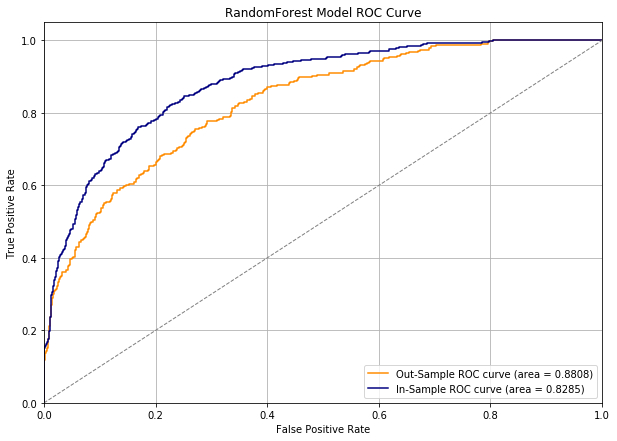

In [58]:
plt.figure(figsize=(10,7))

plt.plot(
    out_sample_fpr, out_sample_tpr, color='darkorange', label='Out-Sample ROC curve (area = %0.4f)' % in_sample_roc_auc
)
plt.plot(
    in_sample_fpr, in_sample_tpr, color='navy', label='In-Sample ROC curve (area = %0.4f)' % out_sample_roc_auc
)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest Model ROC Curve')
plt.legend(loc="lower right")

plt.show()

# The larger the gap between the in-sample ROC curve and the out-of-sample ROC curve, 
# the more the model is overfitting to the train set and fails to generalize the findings for unforeseen data